# How can gaussian filters be used for tracking spiral tips?
Tim Tyree<br>
5.27.2020

In [80]:
import numpy as np
from skimage.filters import gaussian
from skimage.measure import find_contours
import matplotlib.pyplot as plt
# from scipy import ndimage as ndi
# from scipy import special

## too much blurring causes false tips
<img alt="" src='Figures/methods/smallA.png' style="height:350px;width:1050px" />


## not enough blurring causes false tips
<img alt="" src='Figures/methods/smallB.png' style="height:350px;width:1050px" />


# a happy medium is needed to get robust tips
<img alt="" src='Figures/methods/exA.png' style="height:700px;width:2100px" />


# The results in a nutshell

<img alt="" src='Figures/methods/gaussian_blurring_truth_wall_assembled.png' style="height:700px;width:2100px" />

__Parameters for filters.gaussian__
`filters.gaussian(image, sigma=2, mode='wrap', truncate=(VALUE+1)/sigma)` <br>
where VALUE=4 for sigma=2 and the threshold at 0.9.  For other sigma and/or for other threshold, see figure (right) and/or the printed statements below 
_Nota bene: 'wrap' mode uses periodic boundary conditions_<br>

__TODO: retry at a lower threshold and/or at a lower time step -__ note that for moderate-high threshold values of 0.6-0.7, we expect a linear response in the blurred wall edge, which we'd expect to produce smoother or more reliable contour detection.  If supersampling is used together with this idea, the effect should be more pronounced.  This effect may be quantified using the `Exploring Simple Spiral Tip Kinematics.ipynb`.



__Additional Results__<br>
By varying the width of the image, I observe that image width does not affect the x coordinate where the threshold is crossed.  This suggests that gaussian() is a purely local operation, presumably a convolution of a standard gaussian kernel.<br>
_Source Code, which calls ndi.gaussian__filter, for gaussian is here:_
- https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/_gaussian.py
`ndi.gaussian_filter?`

I manually fit an error function to a cross section taken at sigma=25.  That rough fit did not fit curves for other sigma.  The best "nice" scale factor I decided on was dimensionless_scale = np.sqrt(sigma)*2**-5.  Did not work.  Move on.

# Simplest case: a horizontal wall of truth

In [65]:
threshold = 0.9
def save_fun(descrip,ext='.png'):
    return f'Figures/methods/gaussian_blurring_{descrip}{ext}'

#prepare a wall of truth
width = height = 512;
image = np.zeros((height, width))
for i in range(width):
    if i>width/2:
        image[:,i] = 1

for $sigma=25$, we cross the threshold at pixel 33
for $sigma=75$, we cross the threshold at pixel 97
for $sigma=125$, we cross the threshold at pixel 161


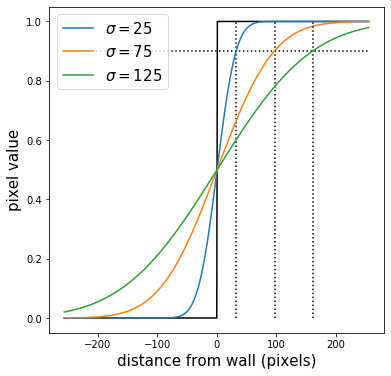

In [66]:
#cross section for various sigma
fontsize = 15
x_values = (np.arange(width)-width/2)#/(width/2)
y_values = image[int(height/2),:]
sigma_values = np.arange(25,150,50)
y_range  = np.linspace(0,1,len(y_values))

#plot
fig, ax  = plt.subplots(1,figsize = (6,6))
ax.plot(x_values, y_values, 'k')
ax.plot(x_values, threshold+0*y_values, 'k:')

for sigma in sigma_values:
    boo_array = gaussian(image, sigma=sigma)[int(height/2),:]>0.9
    if boo_array.any():
        x_crosses = x_values[int(np.argwhere(boo_array)[0])]
        ax.plot(x_crosses+0*x_values, y_range,'k:')
        print(f"for $sigma={sigma}$, we cross the threshold at pixel {int(x_crosses)}")
    # fitting the curve with an error function proved uneffective
    #scale = (width*np.sqrt(sigma)*2**-5)
    #erf_values = 0.5+0.5*special.erf(x_values/scale)
    #     ax.plot(x_values, erf_values)
    ax.plot(x_values, gaussian(image, sigma=sigma)[int(height/2),:], label = f"$\sigma={sigma}$")
ax.legend(loc='upper left',fontsize=fontsize)
ax.set_xlabel('distance from wall (pixels)', fontsize=fontsize)
ax.set_ylabel('pixel value', fontsize=fontsize)
# plt.show()
plt.savefig(save_fun(descrip='blurred_wall_far_out',ext='.svg'))
plt.savefig(save_fun(descrip='blurred_wall_far_out',ext='.png'))

for sigma = 0, we cross the threshold at pixel 1.
for sigma = 1, we cross the threshold at pixel 2.
for sigma = 2, we cross the threshold at pixel 4.
for sigma = 3, we cross the threshold at pixel 5.
for sigma = 4, we cross the threshold at pixel 6.
for sigma = 5, we cross the threshold at pixel 7.
for sigma = 6, we cross the threshold at pixel 9.
for sigma = 8, we cross the threshold at pixel 11.
for sigma = 10, we cross the threshold at pixel 14.


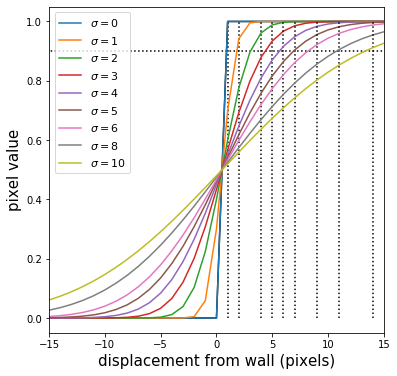

In [67]:
#cross section for various sigma
# fontsize = 15
x_values = (np.arange(width)-width/2)#/(width/2)
y_values = image[int(height/2),:]
sigma_values = [0,1,2,3,4,5,6,8,10]#np.arange(1,10)
y_range  = np.linspace(0,1,len(y_values))

#plot
fig, ax  = plt.subplots(1,figsize = (6,6))
ax.plot(x_values, y_values, 'k')
ax.plot(x_values, threshold+0*y_values, 'k:')
for sigma in sigma_values:
    boo_array = gaussian(image, sigma=sigma)[int(height/2),:]>0.9
    if boo_array.any():
        x_crosses = x_values[int(np.argwhere(boo_array)[0])]
        ax.plot(x_crosses+0*x_values, y_range,'k:')
        print(f"for sigma = {sigma}, we cross the threshold at pixel {int(x_crosses)}.")
    ax.plot(x_values, gaussian(image, sigma=sigma)[int(height/2),:], alpha=1., label = f"$\sigma={sigma}$")
ax.legend(loc='upper left',fontsize=fontsize-4, ncol=1)
ax.set_xlabel('displacement from wall (pixels)', fontsize=fontsize)
ax.set_ylabel('pixel value', fontsize=fontsize)
ax.set_xlim([-15,15])
# plt.show()
plt.savefig(save_fun(descrip='blurred_wall',ext='.svg'))
plt.savefig(save_fun(descrip='blurred_wall',ext='.png'))

In [68]:
threshold_lst = [0.9, 0.8, 0.7, 0.6, 0.4]
sigma_values = [0,1,2,3,4,5,6,8,10]#np.arange(1,10)
x_lst_lst = []
for threshold in threshold_lst:
    x_lst = []
    for sigma in sigma_values:
        boo_array = gaussian(image, sigma=sigma)[int(height/2),:]>threshold
        if boo_array.any():
            x_crosses = x_values[int(np.argwhere(boo_array)[0])]-1 #distance from wall at threshold
            x_lst.append(x_crosses)
    x_lst_lst.append(x_lst)

for sigma = 1, we cross the threshold at pixel 1.
for sigma = 2, we cross the threshold at pixel 2.
for sigma = 3, we cross the threshold at pixel 3.
for sigma = 4, we cross the threshold at pixel 3.
for sigma = 5, we cross the threshold at pixel 4.
for sigma = 6, we cross the threshold at pixel 5.
for sigma = 8, we cross the threshold at pixel 7.
for sigma = 10, we cross the threshold at pixel 8.


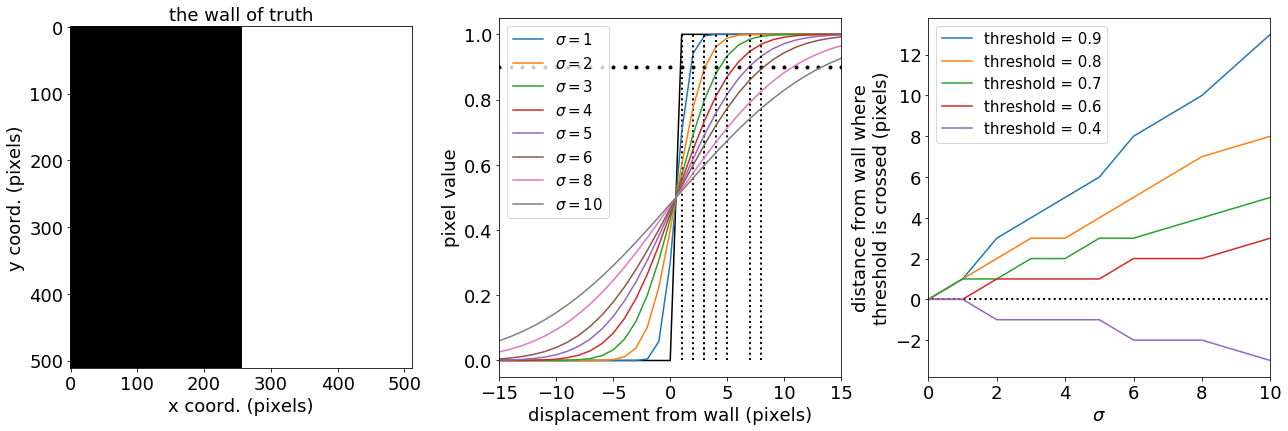

In [82]:
#plot the wall of truth with the other two plots
fig, axs  = plt.subplots(1, 3, figsize = (18,6))
threshold = 0.9
fontsize = 18
ax = axs[0]
ax.imshow(image, cmap='gray')
ax.tick_params(axis='both', labelsize= fontsize)
ax.axis('image');
ax.set_xlabel('x coord. (pixels)', fontsize=fontsize)
ax.set_ylabel('y coord. (pixels)', fontsize=fontsize)
ax.set_title('the wall of truth', fontsize=fontsize)

#plot
ax = axs[1]
ax.plot(x_values, y_values, 'k')
ax.plot(x_values, threshold+0*y_values, 'k.', lw=2)
for sigma in sigma_values[1:]:
    boo_array = gaussian(image, sigma=sigma)[int(height/2),:]>0.8
    if boo_array.any():
        x_crosses = x_values[int(np.argwhere(boo_array)[0])]-1
        ax.plot(x_crosses+0*x_values, y_range,'k:', lw=2)
        print(f"for sigma = {sigma}, we cross the threshold at pixel {int(x_crosses)}.")
    ax.plot(x_values, gaussian(image, sigma=sigma)[int(height/2),:], alpha=1., label = f"$\sigma={sigma}$")
ax.legend(loc='upper left',fontsize=fontsize-3, ncol=1)
ax.tick_params(axis='both', labelsize= fontsize)
ax.set_xlabel('displacement from wall (pixels)', fontsize=fontsize)
ax.set_ylabel('pixel value', fontsize=fontsize)
ax.set_xlim([-15,15])


#plot
ax = axs[2]
ax.plot(x_values, 0*y_values, 'k:', lw=2)
for x_lst, th in zip(x_lst_lst,threshold_lst):
    plt.plot(sigma_values, x_lst, label = f"threshold = {th}")
ax.legend(loc='upper left',fontsize=fontsize-3, ncol=1)
ax.set_ylabel('distance from wall where\nthreshold is crossed (pixels)', fontsize=fontsize)
ax.set_xlabel('$\sigma$', fontsize=fontsize)
ax.tick_params(axis='both', labelsize= fontsize)
ax.set_xlim([0,10])
plt.tight_layout()

plt.show()
# plt.savefig(save_fun(descrip='truth_wall_assembled',ext='.svg'))
# plt.savefig(save_fun(descrip='truth_wall_assembled',ext='.png'))

# $fin$